In [1]:
import numpy as np
import matplotlib.pyplot as plt

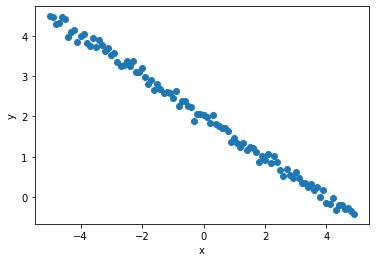

In [3]:
a = -0.5
b = 2
x = np.arange(-5,5,0.1)
y = a*x + b + np.random.normal(0, 0.1 , len(x))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:
class LinearRegression:
    def __init__(self,theta = 1, b = 1, num_iterations = 200, learning_rate = 0.05):
        self.theta = theta
        self.b = b
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate

    def forward(self, X):
        return np.dot(self.theta,X) + self.b

    def computeCost(self, X, Y, P):
        return np.sum((P-Y)**2)/(2*X.shape[0])

    def backward(self, X, Y, P):
        dt = np.dot(X,(P-Y).T)/X.shape[0]
        db = np.sum(P-Y)/X.shape[0]
        return dt,db

    def propagate(self, X, Y):
        P = self.forward(X)
        cost = self.computeCost(X,Y,P) 

        dt,db = self.backward(X,Y,P)
        
        grads = {"dt": dt,
                "db": db}
        
        return grads, cost

    def optimize(self, X, Y):
        for _ in range(self.num_iterations):
            grads, _ = self.propagate(X, Y)
            dt = grads["dt"]
            db = grads["db"]
            self.theta = self.theta-self.learning_rate * dt
            self.b = self.b - self.learning_rate * db
        
        params = {"theta": self.theta,
                "b": self.b}
        
        return params

    def fit(self, X, Y):
        params = self.optimize(X, Y)
        return params

    def predict(self,X):
        prediction = self.forward(X)
        
        return prediction

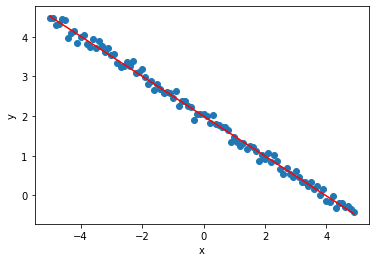

original: a = -0.5; b = 2
Predicted: a = -0.5029286421009717; b = 2.000423156131768


In [14]:
linearRegression = LinearRegression()
parameters = linearRegression.fit(x,y)
preds = linearRegression.predict(x)

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, preds, color='red')
plt.show()

print(f"original: a = {a}; b = {b}")
print(f"Predicted: a = {parameters['theta']}; b = {parameters['b']}")

Task2

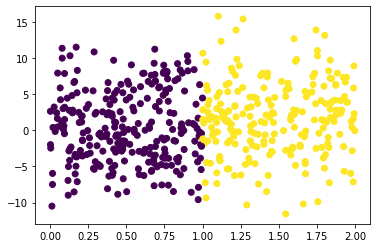

In [67]:
labels = np.random.randint(0, 2, 500)
x = (np.random.rand(500) + labels)
y = x + 5 * np.random.normal(0,1,500)
x = x.reshape(500, 1)
y = y.reshape(500, 1)
labels = labels.reshape(500, 1)
X = np.hstack((x, y)).squeeze().T
Y = labels.T
plt.scatter(X[0,:],X[1,:], c=Y)

In [68]:
class LogisticRegression:
    def __init__(self, theta = np.ones((2,1)), b = 0.1, num_iterations = 1000, learning_rate = 0.05):
        self.theta = theta
        self.b = b
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate

    def sigmoid(self, z):
        return 1./(1+np.exp(-z))

    def forward(self, X):
        return self.sigmoid((self.theta.T @ X) + self.b)

    def computeCost(self, X, Y, P):
        cost = -np.sum(Y*np.log(P)+(1-Y)*np.log(1-P))/ X.shape[1]
        return cost.squeeze()

    def backward(self, X, Y, P):
        dt = (X @ (P-Y).T)/ X.shape[1]
        db = np.sum(P-Y)/ X.shape[1]
        return dt,db

    def propagate(self, X, Y):
        P = self.forward(X)
        cost = self.computeCost(X,Y,P) 

        dt,db = self.backward(X,Y,P)
        
        grads = {"dt": dt,
                "db": db}
        
        return grads, cost

    def optimize(self, X, Y):
        for _ in range(self.num_iterations):
            grads, _ = self.propagate(X, Y)
            dt = grads["dt"]
            db = grads["db"]
            self.theta = self.theta-self.learning_rate * dt
            self.b = self.b - self.learning_rate * db
        
        params = {"theta": self.theta,
                "b": self.b}
        
        return params

    def fit(self, X, Y):
        params = self.optimize(X, Y)
        return params

    def predict(self,X):
        prediction = self.forward(X)
        prediction = (prediction > 0.5).astype(int)
        
        return prediction

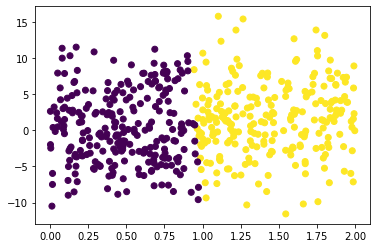

In [69]:
logRegression = LogisticRegression()
parameters = logRegression.fit(X,Y)
preds = logRegression.predict(X)

plt.scatter(X[0,:],X[1,:], c=preds)

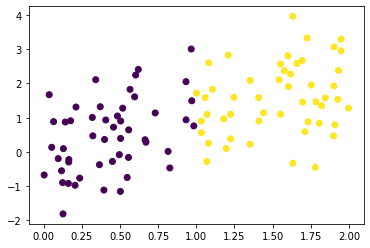

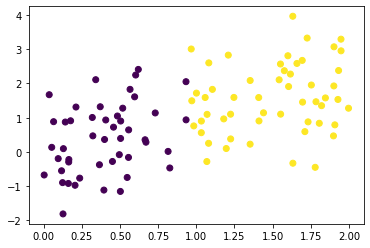

Accuracy =  0.97


In [71]:
labels = np.random.randint(0, 2, 100)
x = (np.random.rand(100) + labels)
y = x + 1 * np.random.normal(0,1,100)
x = x.reshape(100, 1)
y = y.reshape(100, 1)
labels = labels.reshape(100, 1)
X = np.hstack((x, y)).squeeze().T
Y = labels.T
plt.scatter(X[0,:],X[1,:], c=Y)
plt.show()
test_prediction = logRegression.predict(X)

plt.scatter(X[0,:],X[1,:], c=test_prediction)
plt.show()

def accuracy(gt,pr):
    accuracy = (gt == pr).sum() / len(gt)
    return accuracy/100

print("Accuracy = ",accuracy(Y,test_prediction))